The following notebook shows an example of working with the package called `pandas`

It is very powerful if a bit clunky way to work with and manipulate tables.
It is probably the most important package I work with... tied with pylab (used for plotting)

The sample data for this notebook is the table:

Statistics Canada.  Table  36-10-0222-01   Gross domestic product, expenditure-based, provincial and territorial, annual (x 1,000,000)
DOI:   https://doi.org/10.25318/3610022201-eng

When you click the download button, choose the first option. Place the downloaded file in the same directory as this notebook and everything should work!

Note: in the workshop we cleaned the file up manually. Here I clean the file up with pandas.

In [1]:
# here we import the two packages

import pandas as pd #for tables
import pylab as P # for plotting

In [2]:
df = pd.read_csv('3610022201-eng.csv',
            header = 6, # this starts reading at the 6th line (starting from 0), helpfully ignoring the first few useless lines
            index_col = 0, # this tells us the first column is the indices or row names
            na_values = '..', # this replaces '..' which stats can uses to indicate missing data with the more useful NaN (Not-a-Number)
            thousands = ',', # this tells the file-reader that thousands have commas in them in this source, so we can convert everything to useful number formats
           )
df

# here is the table:

,2014,2015,2016,2017,2018
Estimates,,,,,
NaN,Dollars,NaN,NaN,NaN,NaN
Final consumption expenditure,"1,461,209",1491401.0,1521490.0,1570652.0,1607972.0
Household final consumption expenditure,"1,051,562",1075348.0,1096095.0,1136630.0,1161173.0
Goods,"471,589",482358.0,491583.0,512356.0,521347.0
Durable goods,"133,372",137464.0,142504.0,152776.0,155325.0
Semi-durable goods,"76,479",79267.0,80408.0,83114.0,84547.0
Non-durable goods,"261,821",265734.0,268783.0,276491.0,281484.0
Services,"580,021",593042.0,604558.0,624413.0,639881.0
Non-profit institutions serving households' final consumption expenditure,"26,012",27236.0,29687.0,29298.0,29706.0


In [4]:
# we should clean it up a bit more. the first row, 'NaN, Dollars, Nan, NaN, ...' is useless
# as are the last 6 rows (the footer)

df_fixed = df.iloc[1:-6].copy() # to slice by row index, we use the .iloc

df_fixed.loc[:,'2014'] = df_fixed.loc[:,'2014'].apply(lambda x:float(str(x).replace(',',''))) #this cleans up a remaining comma issue...

df_fixed


,2014,2015,2016,2017,2018
Estimates,,,,,
Final consumption expenditure,1461209.0,1491401.0,1521490.0,1570652.0,1607972.0
Household final consumption expenditure,1051562.0,1075348.0,1096095.0,1136630.0,1161173.0
Goods,471589.0,482358.0,491583.0,512356.0,521347.0
Durable goods,133372.0,137464.0,142504.0,152776.0,155325.0
Semi-durable goods,76479.0,79267.0,80408.0,83114.0,84547.0
Non-durable goods,261821.0,265734.0,268783.0,276491.0,281484.0
Services,580021.0,593042.0,604558.0,624413.0,639881.0
Non-profit institutions serving households' final consumption expenditure,26012.0,27236.0,29687.0,29298.0,29706.0
General governments final consumption expenditure,383840.0,389072.0,395989.0,405132.0,417433.0


In [5]:
#I like rows to be years and columns to be variables

df_fixed = df_fixed.transpose()
df_fixed.index = df_fixed.index.astype(int) # this converts the index to integers instead of strings

df_fixed

Estimates,Final consumption expenditure,Household final consumption expenditure,Goods,Durable goods,Semi-durable goods,Non-durable goods,Services,Non-profit institutions serving households' final consumption expenditure,General governments final consumption expenditure,Gross fixed capital formation,...,Less: imports of goods and services,Imports from other countries,Imports of goods from other countries,Imports of services from other countries,Imports from other provinces,Imports of goods from other provinces,Imports of services from other provinces,Statistical discrepancy,Gross domestic product at market prices,Final domestic demand
2014,1461209.0,1051562.0,471589.0,133372.0,76479.0,261821.0,580021.0,26012.0,383840.0,464261.0,...,NaN,616596.0,NaN,NaN,NaN,NaN,NaN,-541.0,1923422.0,1925514.0
2015,1491401.0,1075348.0,482358.0,137464.0,79267.0,265734.0,593042.0,27236.0,389072.0,440073.0,...,NaN,621229.0,NaN,NaN,NaN,NaN,NaN,-841.0,1936100.0,1930878.0
2016,1521490.0,1096095.0,491583.0,142504.0,80408.0,268783.0,604558.0,29687.0,395989.0,419594.0,...,NaN,621544.0,NaN,NaN,NaN,NaN,NaN,1275.0,1955488.0,1939769.0
2017,1570652.0,1136630.0,512356.0,152776.0,83114.0,276491.0,624413.0,29298.0,405132.0,434594.0,...,NaN,647899.0,NaN,NaN,NaN,NaN,NaN,73.0,2017492.0,2003959.0
2018,1607972.0,1161173.0,521347.0,155325.0,84547.0,281484.0,639881.0,29706.0,417433.0,439842.0,...,NaN,664754.0,NaN,NaN,NaN,NaN,NaN,-57.0,2058117.0,2046321.0


In [6]:
# finally, we want to remove the columns that are blank, in other words, are all NaNs

list_of_good_columns = []

for column_name in df_fixed.columns:
    column = df_fixed[column_name]
    if all(column.isna()):
        #print(column_name,'Column filled with NaNs')
        pass
    else:
        #print('good column:',column_name)
        list_of_good_columns.append(column_name)
df_fixed = df_fixed[list_of_good_columns]
df_fixed

# much better!

Estimates,Final consumption expenditure,Household final consumption expenditure,Goods,Durable goods,Semi-durable goods,Non-durable goods,Services,Non-profit institutions serving households' final consumption expenditure,General governments final consumption expenditure,Gross fixed capital formation,...,General governments gross fixed capital formation,Investment in inventories,Of which: business investment in inventories,Non-farm,Farm,Exports to other countries,Imports from other countries,Statistical discrepancy,Gross domestic product at market prices,Final domestic demand
2014,1461209.0,1051562.0,471589.0,133372.0,76479.0,261821.0,580021.0,26012.0,383840.0,464261.0,...,69421.0,11143.0,11149.0,10947.0,232.0,604190.0,616596.0,-541.0,1923422.0,1925514.0
2015,1491401.0,1075348.0,482358.0,137464.0,79267.0,265734.0,593042.0,27236.0,389072.0,440073.0,...,70479.0,1965.0,1967.0,1166.0,731.0,624847.0,621229.0,-841.0,1936100.0,1930878.0
2016,1521490.0,1096095.0,491583.0,142504.0,80408.0,268783.0,604558.0,29687.0,395989.0,419594.0,...,70377.0,1186.0,1098.0,508.0,542.0,633637.0,621544.0,1275.0,1955488.0,1939769.0
2017,1570652.0,1136630.0,512356.0,152776.0,83114.0,276491.0,624413.0,29298.0,405132.0,434594.0,...,74805.0,17951.0,18101.0,17076.0,1037.0,642598.0,647899.0,73.0,2017492.0,2003959.0
2018,1607972.0,1161173.0,521347.0,155325.0,84547.0,281484.0,639881.0,29706.0,417433.0,439842.0,...,78664.0,13025.0,12991.0,12846.0,160.0,662381.0,664754.0,-57.0,2058117.0,2046321.0


In [7]:
#how to acccess a single column. works like a dictionary

df_fixed['Final consumption expenditure']

2014    1461209.0
2015    1491401.0
2016    1521490.0
2017    1570652.0
2018    1607972.0
Name: Final consumption expenditure, dtype: float64

In [8]:
# access a row by its name, or index value, using .loc[] (locate)
df_fixed.loc[2015]

Estimates
Final consumption expenditure                                                1491401.0
Household final consumption expenditure                                      1075348.0
Goods                                                                         482358.0
Durable goods                                                                 137464.0
Semi-durable goods                                                             79267.0
Non-durable goods                                                             265734.0
Services                                                                      593042.0
Non-profit institutions serving households' final consumption expenditure      27236.0
General governments final consumption expenditure                             389072.0
Gross fixed capital formation                                                 440073.0
Business gross fixed capital formation                                        366907.0
Residential structures           

In [9]:
# access a row by its position in the table (again counting from 0)
# using .iloc[] (locate integer)

df_fixed.iloc[1]

Estimates
Final consumption expenditure                                                1491401.0
Household final consumption expenditure                                      1075348.0
Goods                                                                         482358.0
Durable goods                                                                 137464.0
Semi-durable goods                                                             79267.0
Non-durable goods                                                             265734.0
Services                                                                      593042.0
Non-profit institutions serving households' final consumption expenditure      27236.0
General governments final consumption expenditure                             389072.0
Gross fixed capital formation                                                 440073.0
Business gross fixed capital formation                                        366907.0
Residential structures           

In [10]:
#lets calculate GDP  = C + I + G + NX

# isolate the columns we need
df_GDP = df_fixed[[
            'Household final consumption expenditure', #part of C
            "Non-profit institutions serving households' final consumption expenditure", #part of C
            'Gross fixed capital formation', #part of I
            'Investment in inventories', # part of I
            'General governments final consumption expenditure', #G
            'Exports to other countries', # Part of NX
            'Imports from other countries' #part of NX
         ]].copy()

# because we need to subtract imports, let's multiply that column by -1

df_GDP['Imports from other countries'] = -1*df_GDP['Imports from other countries']
df_GDP
df_GDP['GDP by Expenditure'] = df_GDP.sum(axis=1)
df_GDP

Estimates,Household final consumption expenditure,Non-profit institutions serving households' final consumption expenditure,Gross fixed capital formation,Investment in inventories,General governments final consumption expenditure,Exports to other countries,Imports from other countries,GDP by Expenditure
2014,1051562.0,26012.0,464261.0,11143.0,383840.0,604190.0,-616596.0,1924412.0
2015,1075348.0,27236.0,440073.0,1965.0,389072.0,624847.0,-621229.0,1937312.0
2016,1096095.0,29687.0,419594.0,1186.0,395989.0,633637.0,-621544.0,1954644.0
2017,1136630.0,29298.0,434594.0,17951.0,405132.0,642598.0,-647899.0,2018304.0
2018,1161173.0,29706.0,439842.0,13025.0,417433.0,662381.0,-664754.0,2058806.0


In [11]:
# make a new data frame with the column we made and the GDP from the original table, to compare

df_compare = pd.concat([df_GDP[['GDP by Expenditure']],df_fixed[['Gross domestic product at market prices']]],axis=1)

df_compare['Differences'] = df_compare['GDP by Expenditure'] - df_compare['Gross domestic product at market prices']

df_compare
# these differences are on the order of the statistical discrepancy... so good enough for this tutorial!

Estimates,GDP by Expenditure,Gross domestic product at market prices,Differences
2014,1924412.0,1923422.0,990.0
2015,1937312.0,1936100.0,1212.0
2016,1954644.0,1955488.0,-844.0
2017,2018304.0,2017492.0,812.0
2018,2058806.0,2058117.0,689.0


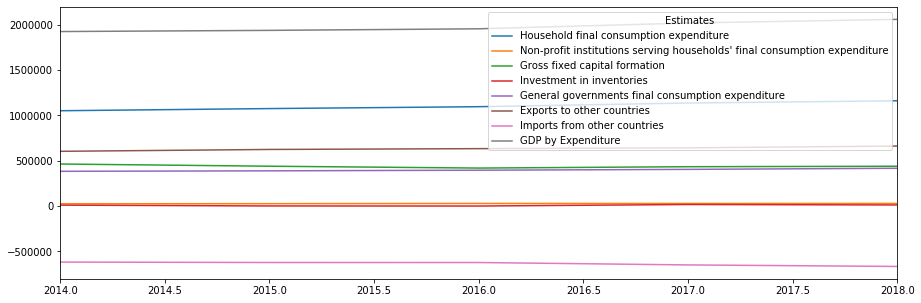

In [12]:
# let's plot the GDP by expenditure
# I would need a whole other session to make this plot more pretty

df_GDP.plot(figsize=(15,5))